Bengisu Tasdelen, 7185755, b.tasdelen@stud.uni-frankfurt.de;
Qiuyan Zhong, 6892838, s0164378@stud.uni-frankfurt.de

Using share-air-pollution data and world.shp data we aimed to develop a kind of a dynamically changing map to visualize the graphically visible deaths air pollution numbers all throughout the world.

In [1]:
import pandas as pd
import geopandas as gpd
import PIL
import io

In [3]:
# reading in the csv data
deaths_air_pollution = pd.read_csv(open(r'/Users/zhongqiuyan/Desktop/share-deaths-air-pollution.csv'))


In [4]:
# drop the useless columns
deaths_air_pollution = deaths_air_pollution.drop(columns = ['Code'])

In [5]:
# change the columns name
deaths_air_pollution.columns = ['Country/Area','Year','deaths from air pollution (%)']


In [6]:
#check if exist null value
deaths_air_pollution.isnull()

,Country/Area,Year,deaths from air pollution (%)
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
6407,False,False,False
6408,False,False,False
6409,False,False,False
6410,False,False,False


In [7]:
# check the year
deaths_air_pollution.loc[:, deaths_air_pollution.columns.isin(['Year'])]


,Year
0,1990
1,1991
2,1992
3,1993
4,1994
...,...
6407,2013
6408,2014
6409,2015
6410,2016


In [8]:
# set  different Years as columns 
data = deaths_air_pollution.set_index(['Country/Area', 'Year']).unstack()['deaths from air pollution (%)']


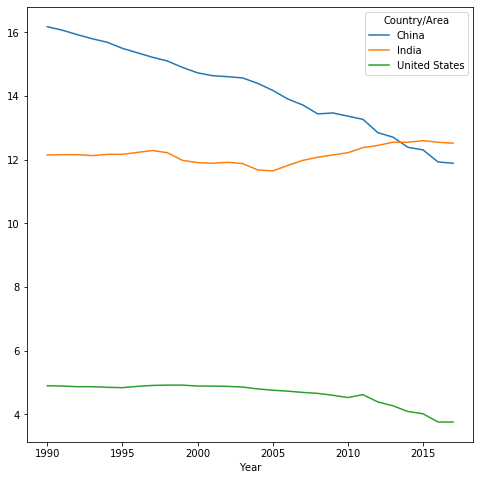

In [9]:
# creat a transpose of the datafram
data_transposed = data.T
data_transposed.plot(y=['China', 'India', 'United States'], use_index = True, figsize = (8,8))


In [10]:
# read in the world map shapefile
world = gpd.read_file(r'/Users/zhongqiuyan/Desktop/Visualizing Geographical Data/world.shp')
    

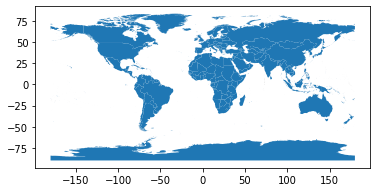

In [11]:
# check the world map
world.plot()


In [12]:
# check the names of the countries for any discrepancies

#for index, rows in data.iterrows():
#    if index not in world['NAME'].to_list():
#        print(index, ":  not in the world_map list")
#    else:
#        pass

In [13]:
# replace the name 
world.replace('Brunei Darussalam', 'Brunei', inplace = True)
world.replace('Congo', 'Congo', inplace = True)
world.replace('Iran (Islamic Republic of)', 'Iran', inplace = True)
world.replace("Lao People's Democratic Republic", 'Laos', inplace = True)
world.replace('Libyan Arab Jamahiriya', 'Libya', inplace = True)
world.replace('The former Yugoslav Republic of Macedonia', 'Macedonia ', inplace = True)
world.replace('Micronesia, Federated States of', 'Micronesia', inplace = True)
world.replace('Republic of Moldova', 'Moldova', inplace = True)
world.replace('Sudan', 'South Sudan', inplace = True)
world.replace('Syrian Arab Republic', 'Syria', inplace = True)
world.replace('United Republic of Tanzania', 'Tanzania', inplace = True)
world.replace('Timor-Leste', 'Timor', inplace = True)
world.replace('Viet Nam', 'Vietnam', inplace = True)
world.replace('Korea, Republic of', 'South Korea', inplace = True)
world.replace("Korea, Democratic People's Republic of", 'North Korea', inplace = True)


In [14]:
# drop the 'world' useless columns
world = world.drop(columns = ['FIPS','ISO2','ISO3','UN','AREA','POP2005','REGION','SUBREGION','LON','LAT'])


In [15]:
# merge the 'data' with 'world' geopandas geodataframe
merge = world.join(data, on = 'NAME', how = 'right')


/Users/zhongqiuyan/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:525: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/Users/zhongqiuyan/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:525: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/Users/zhongqiuyan/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:525: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.p

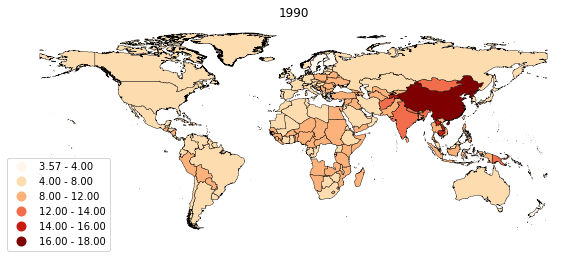

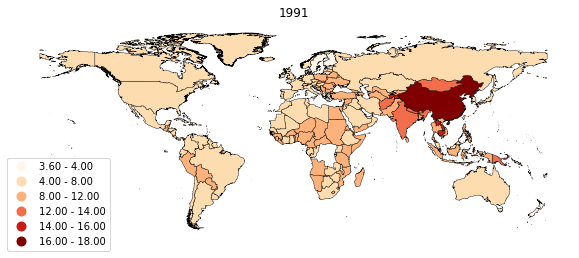

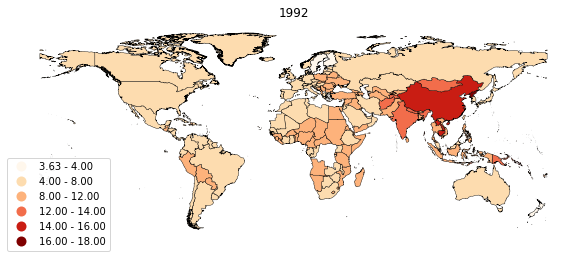

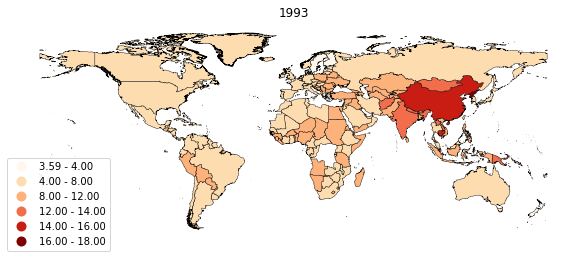

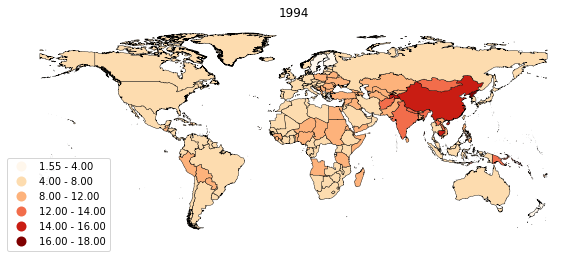

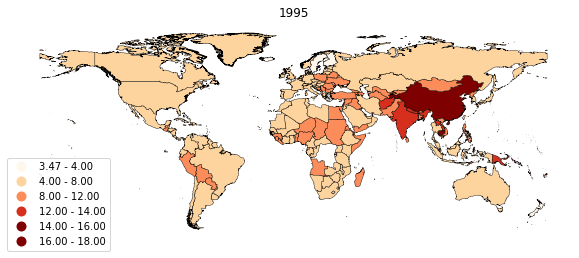

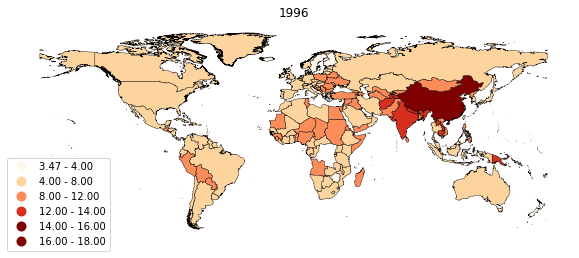

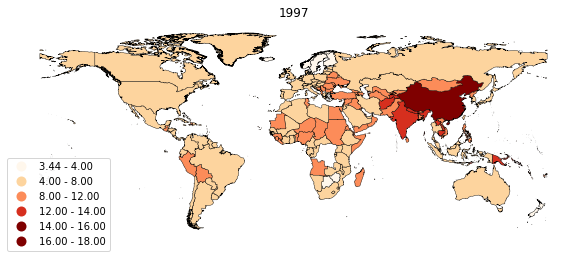

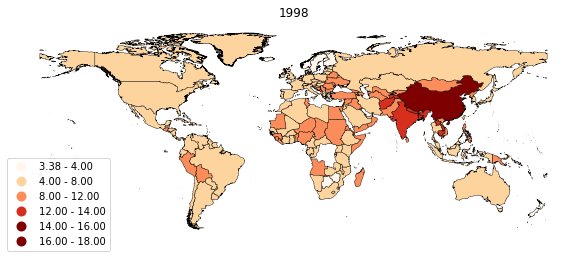

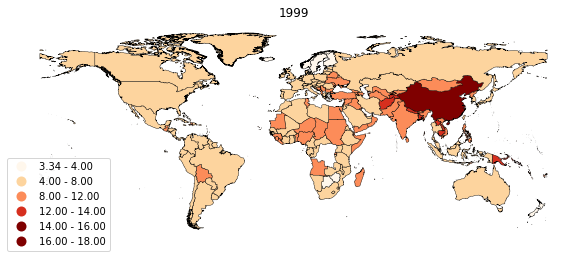

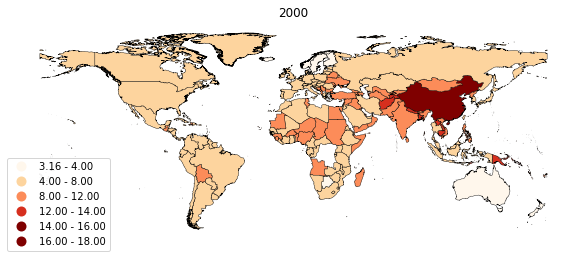

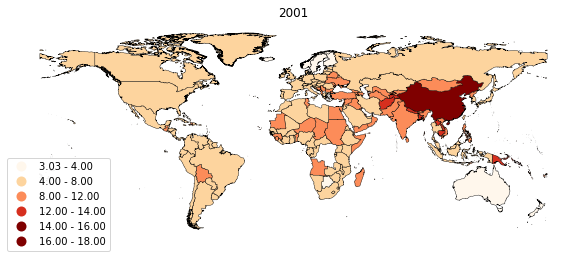

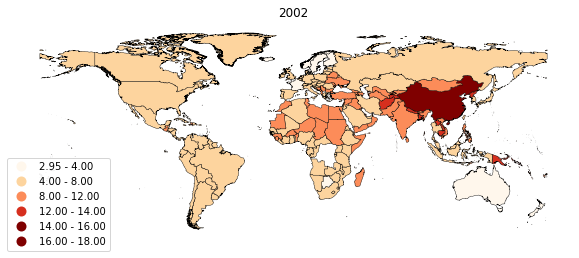

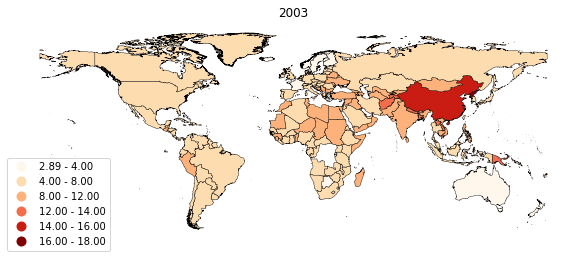

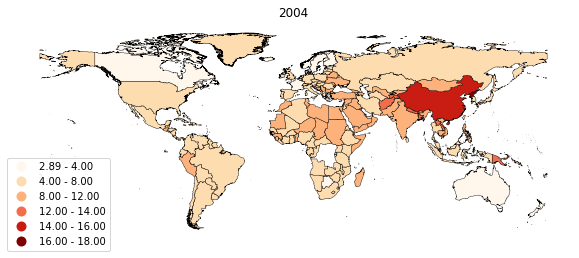

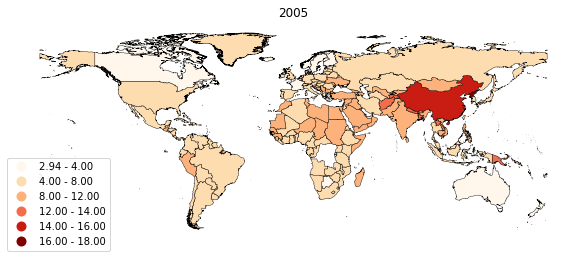

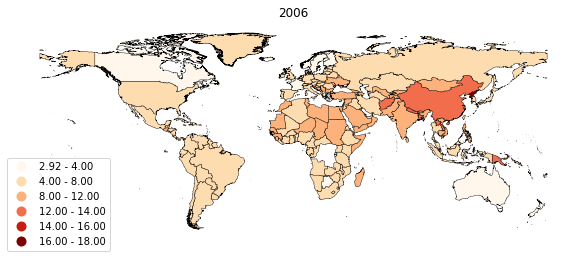

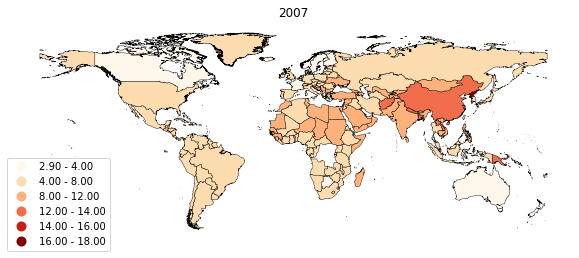

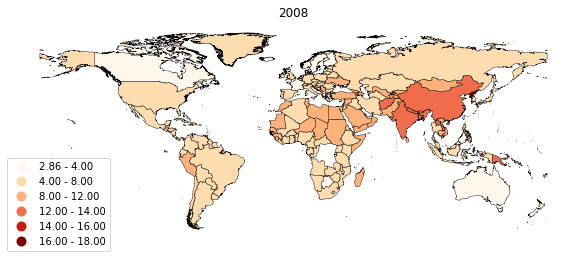

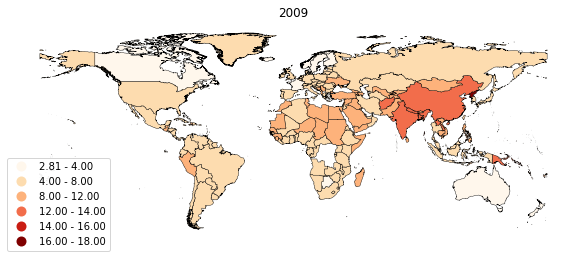

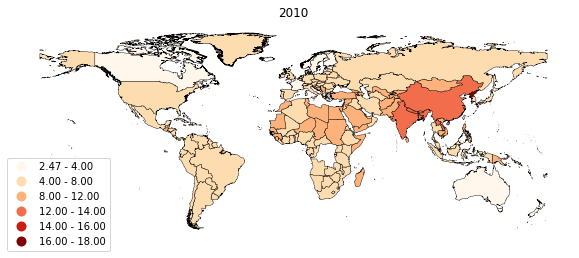

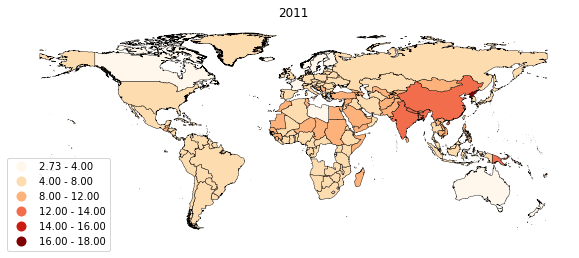

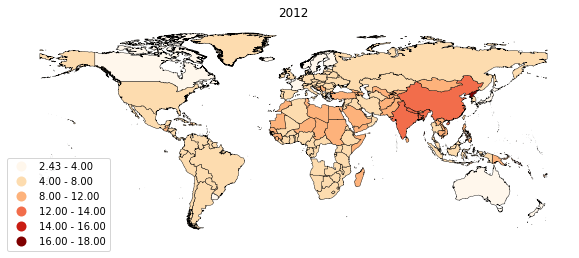

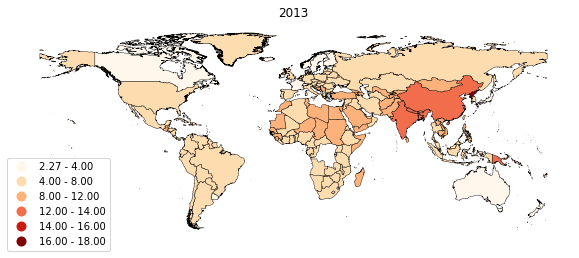

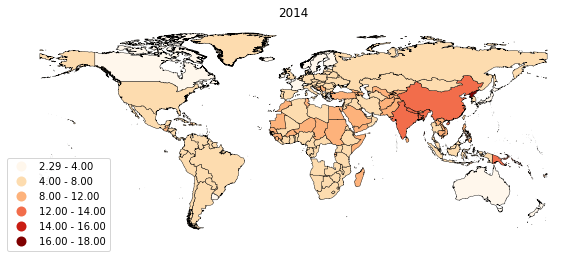

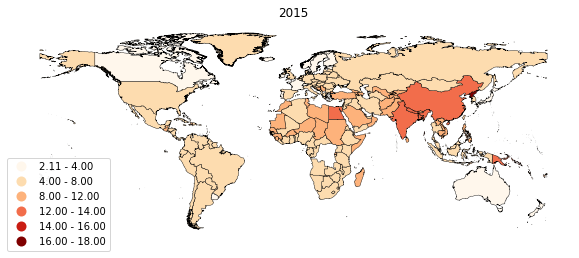

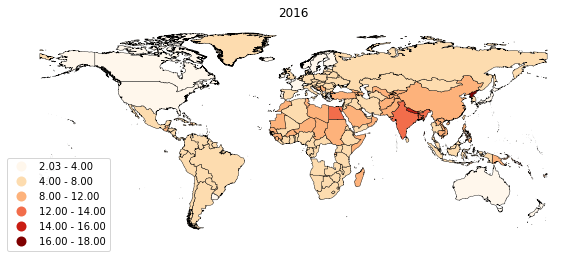

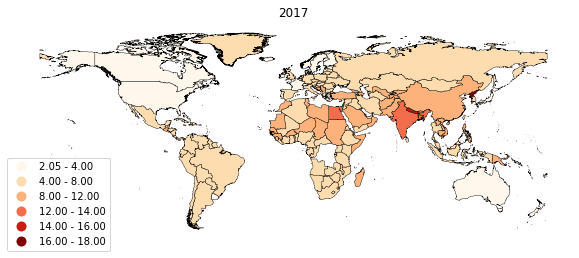

In [18]:
image_frames = []

for year in merge.columns.to_list()[2:30]:
    

    # plot
    ax = merge.plot(column = year, 
                    cmap = 'OrRd', 
                    figsize= (10, 10), 
                    legend = True, 
                    scheme = 'user_defined',
                    classification_kwds ={"bins":[4, 8, 12, 14, 16, 18]},
                    edgecolor = 'black', 
                    linewidth = 0.4)

    
   
        
    #add a title to the map
   # ax.set_title('Share of deaths from the air pollution: ',  fontdict=
                 #{'fontsize':20}, pad =12.5,)
    ax.set_title(year)
    
       
    # removing the axes
    ax.set_axis_off()
    
    # move the legend 
    ax.get_legend().set_bbox_to_anchor((0.18, 0.4))

    img = ax.get_figure()
    
    f = io.BytesIO()
    img.savefig(f, format = 'png', bbox_inches = "tight")
    f.seek(0)
    image_frames.append(PIL.Image.open(f))
    



In [19]:
# creat a GIF animation
image_frames[0].save('Share of deaths from the air pollution.gif', format = 'GIF',
                     append_images = image_frames[1:],
                     save_all = True, duration = 300,
                     loop =1) 

In [20]:
f.close()